# Fashion MNIST Project

# Created by: John Sulzen

Link to dataset used: https://www.kaggle.com/datasets/zalando-research/fashionmnist?resource=download

## Section 1: Instructions

Ensure that the fashion_mnist.csv file is located in the same directiory.
<br>
If you are getting errors loading the data, see the comment under Section 3
<br>
Run the whole script and the results will be displayed in the corresponding sections.

## Section 2: Utils

In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

## Section 3: Data Loading and Preprocessing

In [2]:
os.chdir(r"C:\Users\John\Documents\MachineLearning\Project_2") 
#^ uncomment this and change this to the directory that both files are in if you are having errors loading data
# print(os.getcwd()) #display current directory for verification
fashion_df = pd.read_csv("fashion_mnist.csv")

class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

### Preprocessing

In [3]:
#Taken from ITCS 3156 homework
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [11]:
sampled_df = fashion_df.sample(n=12000, random_state=42)

X_sampled = sampled_df.iloc[:, 1:].values #pixel columns (image data)
y_sampled = sampled_df["label"].values #label columns

X_sampled = X_sampled / 255.0 #normalizing the light value to between 0 and 1

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X_sampled, y_sampled)

print("Training set shape:", X_trn.shape, y_trn.shape)
print("Validation set shape:", X_vld.shape, y_vld.shape)
print("Test set shape:", X_tst.shape, y_tst.shape)

Training set shape: (7680, 784) (7680,)
Validation set shape: (1920, 784) (1920,)
Test set shape: (2400, 784) (2400,)


# Data Visualization and Analysis

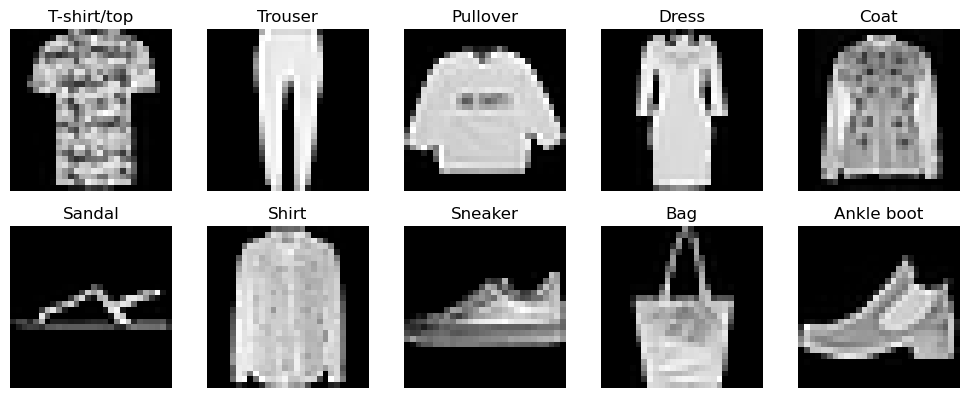

In [12]:
#find one image per class
plt.figure(figsize=(10, 10))
for class_id, class_name in class_names.items():
    #get  first image for the given class
    sample_image = fashion_df[fashion_df["label"] == class_id].iloc[0, 1:].values
    sample_image = sample_image.reshape(28, 28) #images are 28x28 pixels

    #plotting
    plt.subplot(5, 5, class_id + 1)
    plt.imshow(sample_image, cmap="gray") #data is greyscale
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [13]:
#print out chart displaying class discrepancy! ***

# Logistic Regression Model

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg_model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000, #adjust if needed!
    random_state=42
)

#train on data
log_reg_model.fit(X_trn, y_trn)

#eval with validation set
y_vld_pred = log_reg_model.predict(X_vld)
vld_accuracy = accuracy_score(y_vld, y_vld_pred)
print(f"Validation Accuracy: {vld_accuracy:.2f}")

#eval with test set
y_tst_pred = log_reg_model.predict(X_tst)
tst_accuracy = accuracy_score(y_tst, y_tst_pred)
print(f"Test Accuracy: {tst_accuracy:.2f}")

Validation Accuracy: 0.83
Test Accuracy: 0.83


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       232
           1       0.96      0.95      0.96       226
           2       0.74      0.73      0.73       259
           3       0.79      0.89      0.84       227
           4       0.72      0.74      0.73       240
           5       0.90      0.87      0.89       238
           6       0.62      0.57      0.59       244
           7       0.90      0.93      0.91       262
           8       0.95      0.91      0.93       230
           9       0.93      0.94      0.94       242

    accuracy                           0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.83      0.83      0.83      2400



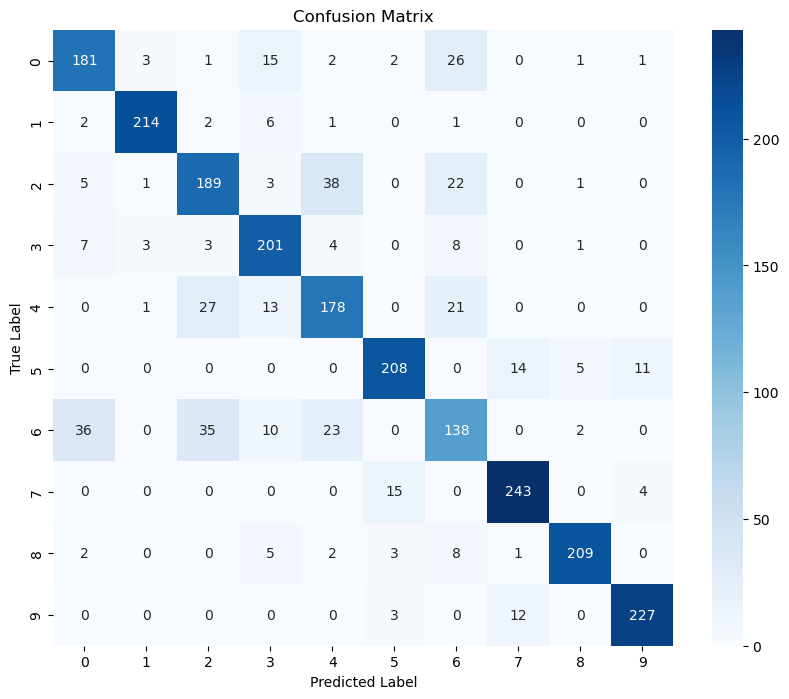

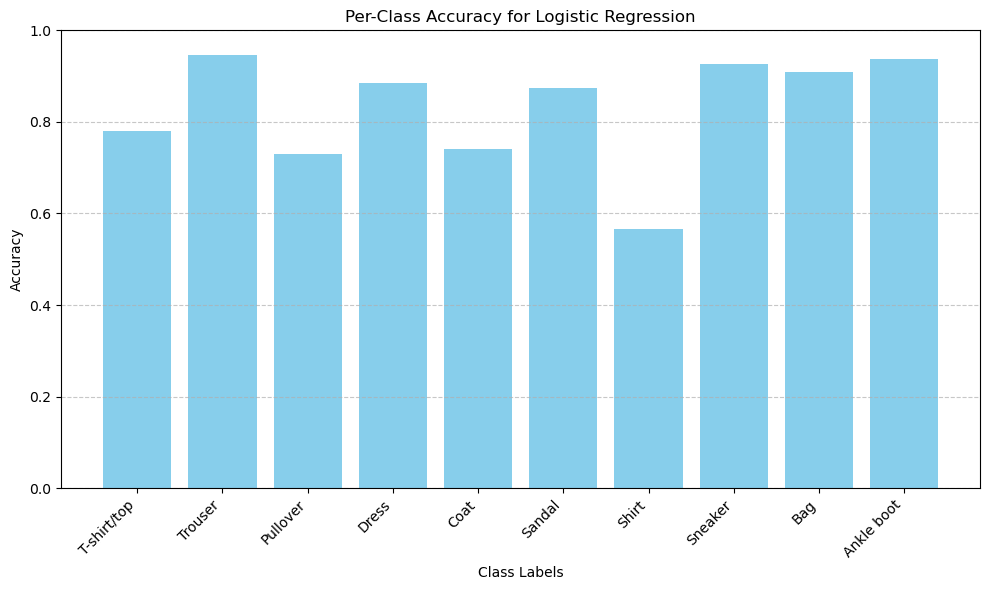

In [15]:
#Classification report
print("Classification Report:")
print(classification_report(y_tst, y_tst_pred))

#Confusion matrix: ----------------------------------
conf_matrix = confusion_matrix(y_tst, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Bar graph: ------------------------------------------

unique_labels = np.unique(y_tst)
per_class_accuracy = []

for label in unique_labels:
    correct = ((y_tst == label) & (y_tst_pred == label)).sum() #correct preds
    total = (y_tst == label).sum() #total instances
    per_class_accuracy.append(correct / total)

#map to class names from dict
class_labels = [class_names[label] for label in unique_labels]

#make graph
plt.figure(figsize=(10, 6))
plt.bar(class_labels, per_class_accuracy, color='skyblue')
plt.title("Per-Class Accuracy for Logistic Regression with Logistic Regression")
plt.xlabel("Class Labels")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

#display graph
plt.tight_layout()
plt.show()

# SVM (Support Vector Machine) Model

In [20]:
from sklearn.svm import SVC

#initialize svm model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

#train model
svm_model.fit(X_trn, y_trn)

#make predictions on tst:
y_pred_svm = svm_model.predict(X_tst)

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       232
           1       0.96      0.96      0.96       226
           2       0.72      0.71      0.71       259
           3       0.83      0.86      0.85       227
           4       0.70      0.74      0.72       240
           5       0.89      0.88      0.89       238
           6       0.60      0.55      0.57       244
           7       0.89      0.89      0.89       262
           8       0.95      0.90      0.93       230
           9       0.92      0.94      0.93       242

    accuracy                           0.82      2400
   macro avg       0.82      0.82      0.82      2400
weighted avg       0.82      0.82      0.82      2400



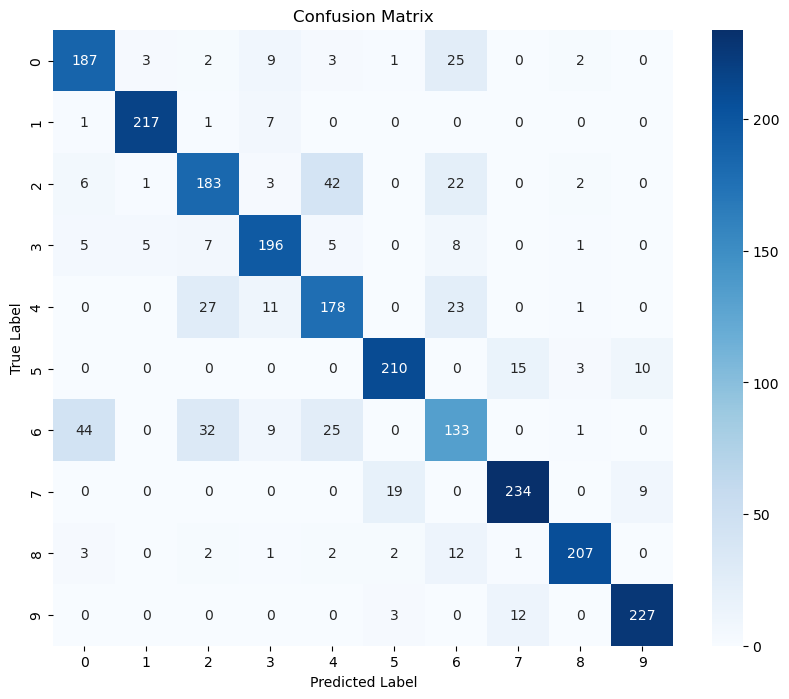

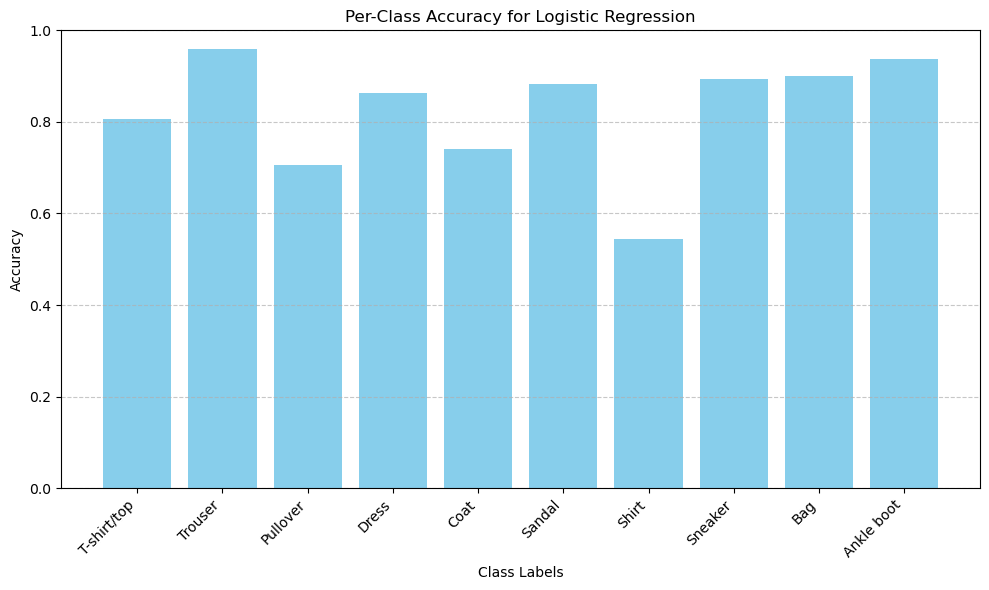

In [25]:
#Classification report:

print("Classification Report for SVM:")
print(classification_report(y_tst, y_pred_svm))

#Confusion matrix:

conf_matrix = confusion_matrix(y_tst, y_pred_svm)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Bar graph:

unique_labels = np.unique(y_tst)
per_class_accuracy = []

for label in unique_labels:
    correct = ((y_tst == label) & (y_pred_svm == label)).sum() #correct preds
    total = (y_tst == label).sum() #total instances
    per_class_accuracy.append(correct / total)

#map to class names from dict
class_labels = [class_names[label] for label in unique_labels]
#Make graph
plt.figure(figsize=(10, 6))
plt.bar(class_labels, per_class_accuracy, color='skyblue')
plt.title("Per-Class Accuracy for Logistic Regression with SVM")
plt.xlabel("Class Labels")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

#display graph
plt.tight_layout()
plt.show()